## Importing Libraries

In [1]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import arabic_reshaper
from bidi.algorithm import get_display
import pandas as pd
import matplotlib.pyplot as plt

## As our Dataset contain mixed training and testing samples. so separating the samples into train and test dataframes.

In [2]:
datafilename = "ArabicNewspapersCorpus.csv"
pdf = pd.read_csv(datafilename)
pdf_train = pdf[pdf['split']=='train']
pdf_test  = pdf[pdf['split']=='test']

In [3]:
pdf_train

text country     topic  \
0            واليكنوفسكي الرئيس التنفيذي لماجد الفطي...      AE   Economy   
1      «أيام ومحطات في حياتي العملية»  كتاب جديد يرص...      SA   Culture   
2      فان بيرسي يسعى لإثبات نفسه أمام روبن وشنايدر ...      JO     Sport   
3      صحة:   الكشف عن مرض غامض يشابه الأيدز بآسيا  ...      DZ   Science   
4      السعودية تهزم اليمن وتعادل أبيض بين البحرين و...      JO     Sport   
...                                                 ...     ...       ...   
2615   دهاليز وكواليس سياسية   بتاريخ 9-9-1433 هـ   ...      SD  Politics   
2616   ثقافة وفنون      صحيفة الوكاد  العالم عبد الل...      SA   Culture   
2617   كلاسيكو المغرب ينتهي بالتعادل ويبقي الصدارة ع...      JO     Sport   
2618   ثقافة اليوم الرياض   نادي الرياض الأدبي..  أس...      SA   Culture   
2619   المدعى العام لجرائم دارفور ياسر أحمد محمد لـ(...      SD  Politics   

      split  
0     train  
1     train  
2     train  
3     train  
4     train  
...     ...  
2615  train  
2616  train  
2617  train  
2618  train  
2619  train  

[2620 rows x 4 columns]

In [4]:
print("Length Train:",len(pdf_train))
print("Length Test :",len(pdf_test))

Length Train: 2620
Length Test : 290


In [5]:
'''Here the counter module is simply just take the count of the work and displaying in form of dataframe'''

from collections import Counter
results = Counter()
# spliting by space, use regExp or another tokenizer
pdf['text'].str.split().apply(results.update)
CountData = pd.DataFrame([[k,results[k]] for k in results],)
CountData.columns = ['word','counts']

In [6]:
CountData[:100]

word  counts
0   واليكنوفسكي       6
1        الرئيس    1432
2      التنفيذي     214
3         لماجد       3
4        الفطيم      11
..          ...     ...
95       امتلاك      45
96      المساحة      46
97      الكافية      36
98     لاستيعاب       8
99          هذا    8344

[100 rows x 2 columns]

In [7]:
CountDataSorted = CountData.sort_values(['counts'],ascending=False)
CountDataSorted = CountDataSorted.set_index('word')

In [8]:
CountDataSorted[:20]

counts
word        
في     71313
من     56138
على    32096
أن     23693
إلى    17728
التي   14457
عن     12450
ما     10350
الذي    9630
لا      9199
مع      8556
هذا     8344
أو      7708
هذه     7386
الله    6740
ان      5807
بين     5472
الى     5264
كان     5176
،       5061

In [9]:
len(CountDataSorted)

297673

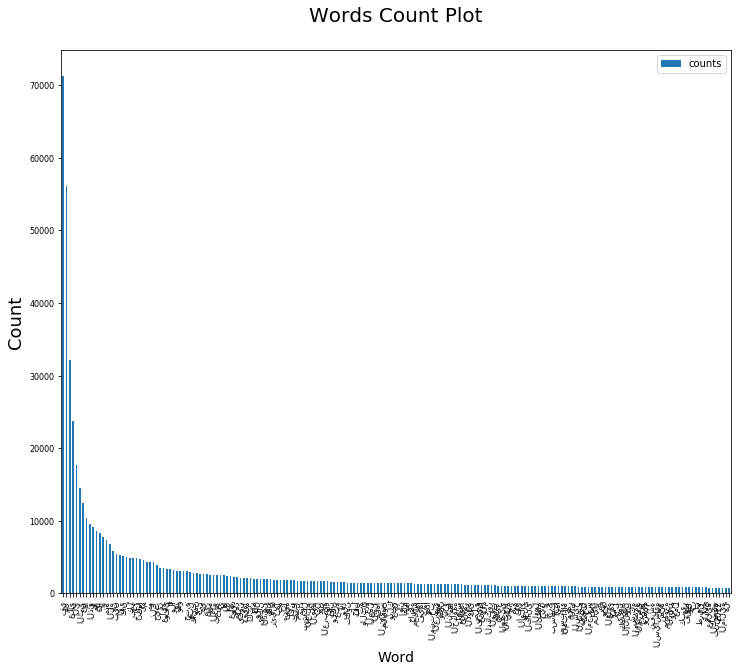

In [10]:
%matplotlib inline
ax = CountDataSorted[:200].plot(kind='bar', fontsize=8, figsize=(12,10))
ax.set_title('Words Count Plot\n', fontsize=20)
ax.set_xlabel('Word', fontsize=14)
ax.set_ylabel('Count', fontsize=18);

In [11]:
# Join the text and target labels in a list
text_and_labels = list(zip(pdf_train['text'], pdf_train['topic']))
classes = set(pdf_train['topic'])
class_text = {}
# for every element in the list
for index, (text, label) in enumerate(text_and_labels[:40]):
    print(index,text[:50],label)
    if(label in class_text):
        class_text[label] += ' '+ text
    else:
        class_text[label] = text


0        واليكنوفسكي الرئيس التنفيذي لماجد الفطيم ال Economy
1  «أيام ومحطات في حياتي العملية»  كتاب جديد يرصد تط Culture
2  فان بيرسي يسعى لإثبات نفسه أمام روبن وشنايدر    ف Sport
3  صحة:   الكشف عن مرض غامض يشابه الأيدز بآسيا  الجم Science
4  السعودية تهزم اليمن وتعادل أبيض بين البحرين وإيرا Sport
5        نمواً في العضوية و8?4% بشهادات المنشأ  136  Economy
6  شرفة الرأي    منتخب كرة السلة فقد فرصة التأهل للي Sport
7  25? من مرضى السكري بحاجة إلى بطاقة الضمان الاجتما Science
8  رئيس مصر الجديد.. هل يبدد مخاوف المثقفين؟  وصل إل Culture
9      احذروا "دولة الإخوان"!    ثمة مخاوف وهواجس مب Politics
10    المؤسسات المالية غير المصرفية.. ما لها وما عليه Economy
11  (العرب) فضحت الشباب!  عمار ساطع    أزمَة حقيقة تل Sport
12    مجلس الوزراء يناقش التحضيرات الجارية لعقد مؤتمر Politics
13  أنا سُنيّ حسينيّ، جعلت ترحمي عليه مكان أنيني، أنا Religion
14  النصر رسب في فحص الليث   ناصر (قووول) يعزز صدارة  Sport
15  هذا القرآن يهدي للتي هي أقوم، إنه الكتاب الذي لا  Religion
16        340 مليون دولا

In [13]:
class_text.keys()

dict_keys(['Economy', 'Culture', 'Sport', 'Science', 'Politics', 'Religion'])

## Generating our Wordcloud images by using Arabic_reshaper and wordcloud library. The font used here is 'sahel.ttf' you can use any format.

Economy 51245


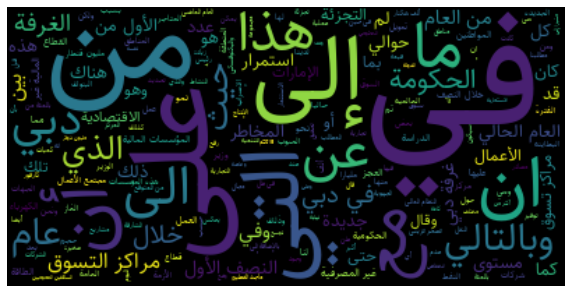

Culture 18002


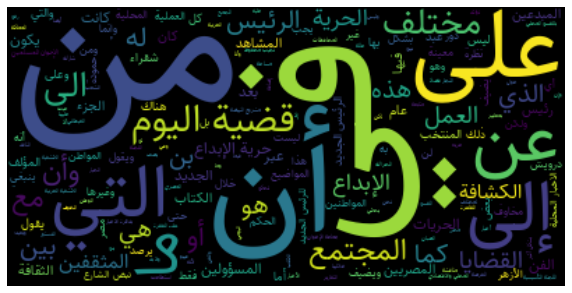

Sport 69616


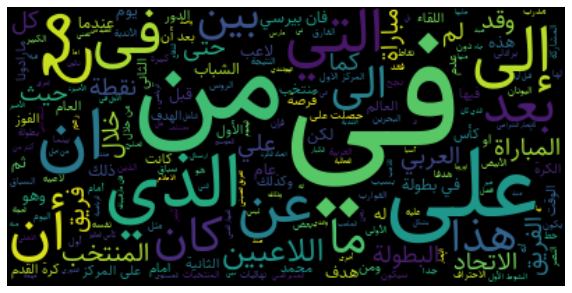

Science 16918


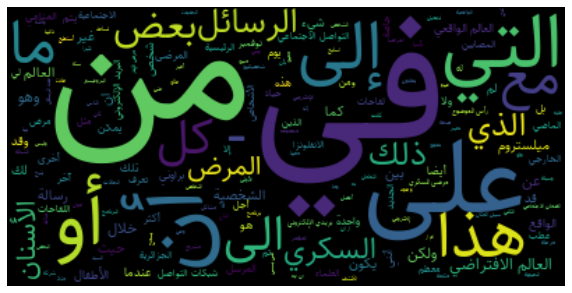

Politics 19804


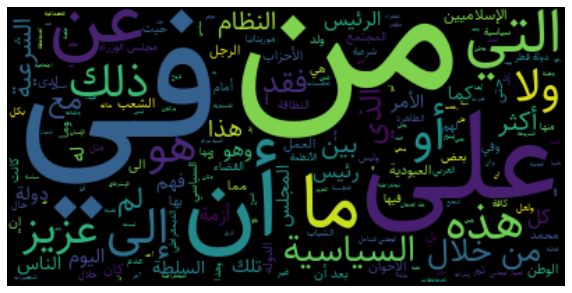

Religion 11763


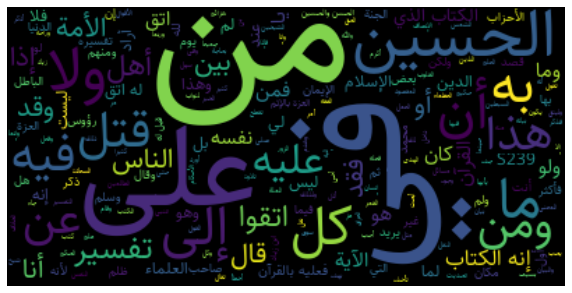

In [14]:
# Generate a word cloud image

for cl in class_text:
    print(cl, len(class_text[cl]))
    unicode_text= class_text[cl]
    reshaped_text = arabic_reshaper.reshape(unicode_text)    # correct its shape
    bidi_text = get_display(reshaped_text) 

    # Generate a wordcloud
#     wc = WordCloud(background_color="white", max_words=1000, 
#                font_path='NotoNaskhArabic-Regular.ttf',
#                collocations=True,contour_width=1, contour_color='firebrick').generate(bidi_text)
    wc = wordcloud = WordCloud(font_path='Sahel.ttf').generate(bidi_text)

    # show
    plt.figure(figsize=[10,10])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Economy 51245


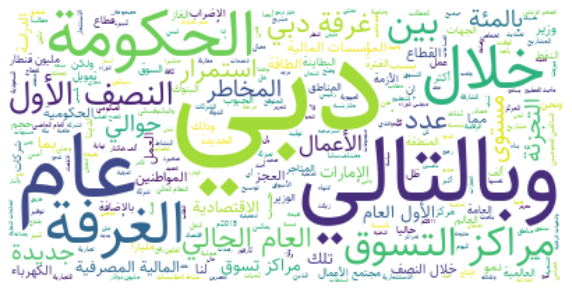

Culture 18002


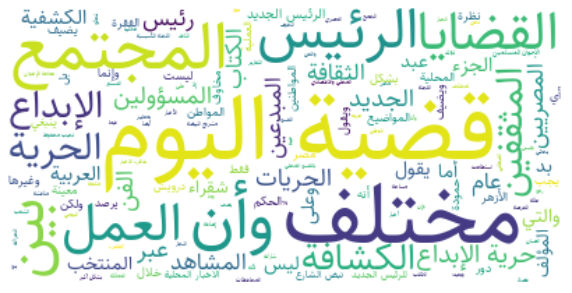

Sport 69616


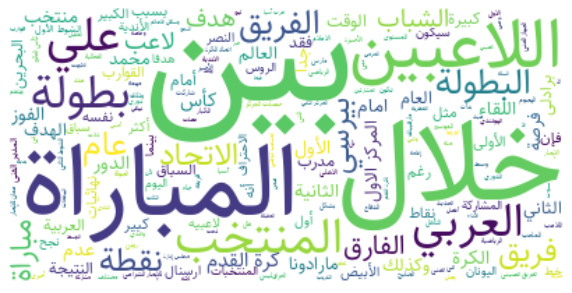

Science 16918


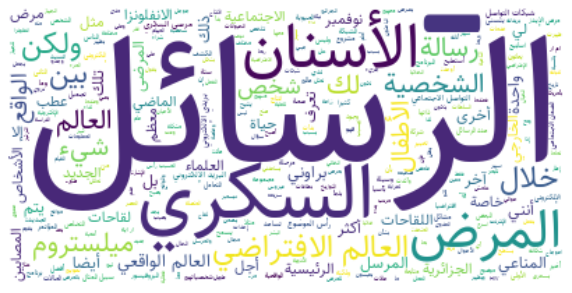

Politics 19804


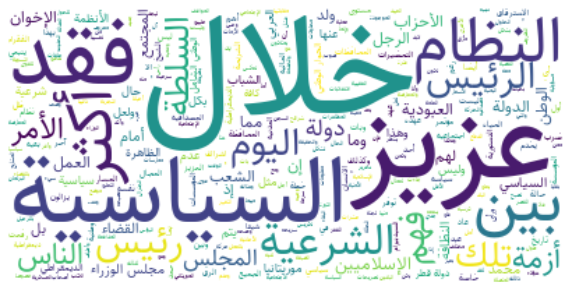

Religion 11763


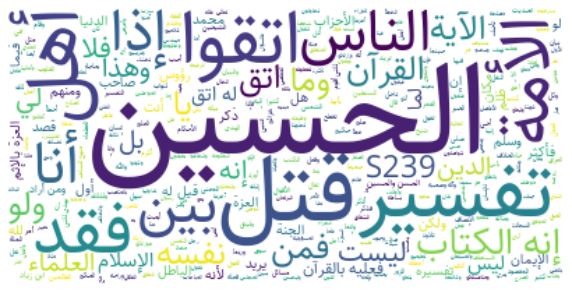

In [15]:
stopwordsList= set(['أو','','','فى', 'في', 'كل', 'لم', 'لن', 'له', 'من', 'هو', 'هي', 'قوة', 'كما', 'لها', 'منذ', 'وقد', 'ولا', 'لقاء', 'مقابل', 'هناك', 'وقال', 'وكان', 'وقالت', 'وكانت', 'فيه', 'لكن', 'وفي', 'ولم', 'ومن', 'وهو', 'وهي', 'يوم', 'فيها', 'منها', 'يكون', 'يمكن', 'حيث', 'االا', 'اما', 'االتى', 'التي', 'اكثر', 'ايضا', 'الذى', 'الذي', 'الان', 'الذين', 'ابين', 'ذلك', 'دون', 'حول', 'حين', 'الى', 'انه', 'اول', 'انها', 'ف', 'و', 'و6', 'قد', 'لا', 'ما', 'مع', 'هذا', 'واحد', 'واضاف', 'واضافت', 'فان', 'قبل', 'قال', 'كان', 'لدى', 'نحو', 'هذه', 'وان', 'واكد', 'كانت', 'واوضح', 'ب', 'ا', 'أ', '،', 'عن', 'عند', 'عندما', 'على', 'عليه', 'عليها', 'تم', 'ضد', 'بعد', 'بعض', 'حتى', 'اذا', 'احد', 'بان', 'اجل', 'غير', 'بن', 'به', 'ثم', 'اف', 'ان', 'او', 'اي', 'بها', 'إلى','أن'])
# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=1000, 
               font_path='Sahel.ttf',
               collocations=True,
               stopwords=stopwordsList, contour_width=1, contour_color='firebrick')


for cl in class_text:
    print(cl, len(class_text[cl]))
    unicode_text= class_text[cl]
    unicode_text = ' '.join([w for w in unicode_text.split() if w not in stopwordsList])
    reshaped_text = arabic_reshaper.reshape(unicode_text)    # correct its shape
    bidi_text = get_display(reshaped_text) 

    # Generate a wordcloud
    wc.generate(bidi_text)

    # show
    plt.figure(figsize=[10,10])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [16]:
# Join the text and target labels in a list
text_and_labels = list(zip(pdf_train['text'], pdf_train['country']))
classes = set(pdf_train['country'])
class_text = {}
# for every element in the list
for index, (text, label) in enumerate(text_and_labels[:20]):
    #print(index,text[:10],label)
    if(label in class_text):
        class_text[label] += ' '+ text
    else:
        class_text[label] = text


In [17]:
#class_text

AE 24896


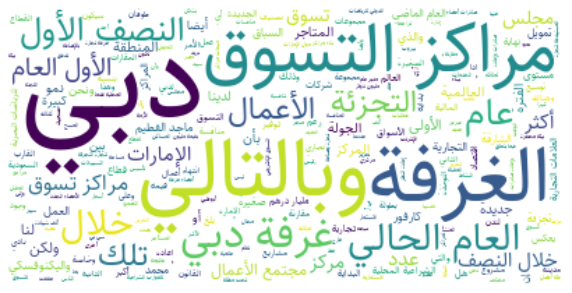

SA 17025


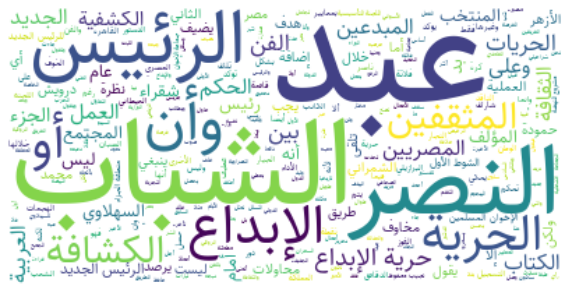

JO 29961


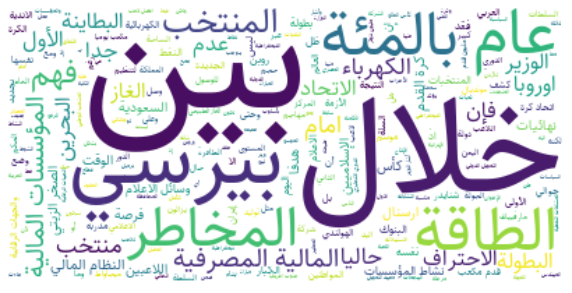

DZ 14100


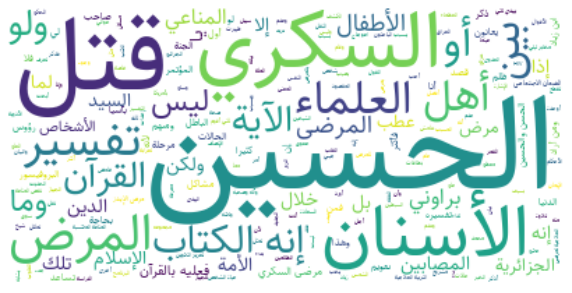

IQ 3225


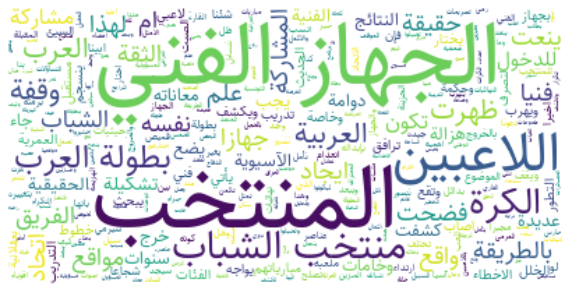

YE 3275


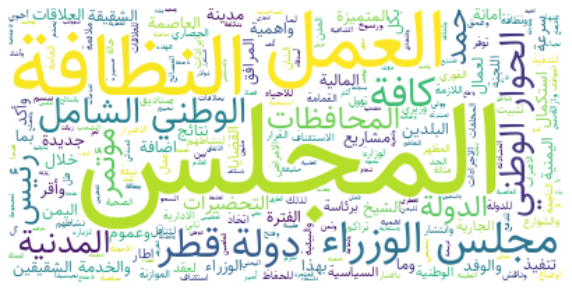

TN 3755


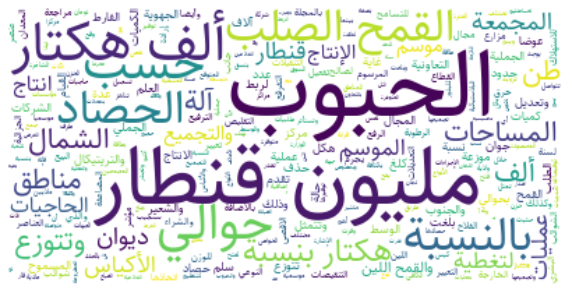

LB 5387


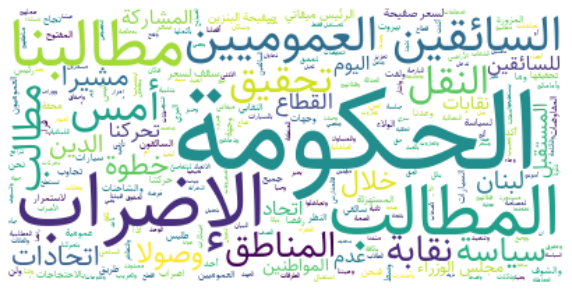

In [18]:
stopwordsList= set(['فى', 'في', 'كل', 'لم', 'لن', 'له', 'من', 'هو', 'هي', 'قوة', 'كما', 'لها', 'منذ', 'وقد', 'ولا', 'لقاء', 'مقابل', 'هناك', 'وقال', 'وكان', 'وقالت', 'وكانت', 'فيه', 'لكن', 'وفي', 'ولم', 'ومن', 'وهو', 'وهي', 'يوم', 'فيها', 'منها', 'يكون', 'يمكن', 'حيث', 'االا', 'اما', 'االتى', 'التي', 'اكثر', 'ايضا', 'الذى', 'الذي', 'الان', 'الذين', 'ابين', 'ذلك', 'دون', 'حول', 'حين', 'الى', 'انه', 'اول', 'انها', 'ف', 'و', 'و6', 'قد', 'لا', 'ما', 'مع', 'هذا', 'واحد', 'واضاف', 'واضافت', 'فان', 'قبل', 'قال', 'كان', 'لدى', 'نحو', 'هذه', 'وان', 'واكد', 'كانت', 'واوضح', 'ب', 'ا', 'أ', '،', 'عن', 'عند', 'عندما', 'على', 'عليه', 'عليها', 'تم', 'ضد', 'بعد', 'بعض', 'حتى', 'اذا', 'احد', 'بان', 'اجل', 'غير', 'بن', 'به', 'ثم', 'اف', 'ان', 'او', 'اي', 'بها', 'إلى','أن'])
# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=1000, 
               font_path='Sahel.ttf',
               collocations=True,
               stopwords=stopwordsList, contour_width=1, contour_color='firebrick')


for cl in class_text:
    print(cl, len(class_text[cl]))
    unicode_text= class_text[cl]
    unicode_text = ' '.join([w for w in unicode_text.split() if w not in stopwordsList])
    reshaped_text = arabic_reshaper.reshape(unicode_text)    # correct its shape
    bidi_text = get_display(reshaped_text) 

    # Generate a wordcloud
    wc.generate(bidi_text)

    # show
    plt.figure(figsize=[10,10])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Arabic Text Classification MiniProject


Using the data provided in ArabicNewspapersCorpus.csv, do:
1. From the train data, extract the top 50 words for each topic
2. From the train data, extract the top 50 words for each country
3. Build a classifier to predict the correct country for the 290 documents in the test split
4. Build a classifier to predict the correct topic for the 290 documents in the test split

##  Extract the top 50 words for each topic

In [19]:
from collections import Counter
results = Counter()

pdf_train_economy = pdf_train[pdf_train['topic']=='Economy']
pdf_train_economy['text'].str.split().apply(results.update)
CountData = pd.DataFrame([[k,results[k]] for k in results],)
CountData.columns = ['word','counts']
CountDataSorted = CountData.sort_values(['counts'],ascending=False)
CountDataSorted = CountDataSorted.set_index('word')
CountDataSorted[:50]

counts
word              
في           11412
من            8928
على           5006
أن            3612
إلى           3421
التي          2429
عن            1675
خلال          1547
مع            1439
ما            1291
هذا           1220
هذه           1184
الذي          1116
الى           1106
ان            1004
العام          985
مليون          905
بين            861
لا             841
حيث            799
كما            757
أو             702
مليار          685
بنسبة          584
القطاع         575
المالية        564
بعد            542
إن             539
عام            499
غير            493
دولار          478
ذلك            474
كل             471
الحكومة        461
لم             452
نحو            445
وفي            437
السوق          433
شركة           427
وقال           420
العمل          418
الاقتصاد       416
قد             405
تم             403
قبل            401
أي             398
أسعار          393
عدد            392
الاقتصادية     390
الدول          387

In [20]:
from collections import Counter
results = Counter()

pdf_train_Culture = pdf_train[pdf_train['topic']=='Culture']
pdf_train_Culture['text'].str.split().apply(results.update)
CountData = pd.DataFrame([[k,results[k]] for k in results],)
CountData.columns = ['word','counts']
CountDataSorted = CountData.sort_values(['counts'],ascending=False)
CountDataSorted = CountDataSorted.set_index('word')
CountDataSorted[:50]

counts
word           
في        11984
من         9184
على        4665
أن         3515
إلى        2890
التي       2653
عن         2440
ما         1934
الذي       1772
لا         1725
هذا        1705
أو         1510
هذه        1232
،          1226
مع         1218
كان        1050
بين        1017
كما         894
هو          880
كل          872
و           850
لم          811
ذلك         791
ان          724
الى         699
حيث         654
خلال        633
بعد         611
هي          600
كانت        596
وفي         592
بن          584
محمد        577
ولا         568
وهو         566
-           524
حتى         523
العربية     515
.           513
ومن         502
قد          498
الثقافة     488
فيها        483
له          459
وهي         447
عام         444
ثم          442
إن          438
الله        427
عبد         426

In [21]:
from collections import Counter
results = Counter()

pdf_train_Sport = pdf_train[pdf_train['topic']=='Sport']
pdf_train_Sport['text'].str.split().apply(results.update)
CountData = pd.DataFrame([[k,results[k]] for k in results],)
CountData.columns = ['word','counts']
CountDataSorted = CountData.sort_values(['counts'],ascending=False)
CountDataSorted = CountDataSorted.set_index('word')
CountDataSorted[:50]

counts
word            
في         11311
من          7351
على         5148
أن          2626
الذي        1982
التي        1863
إلى         1802
مع          1694
عن          1424
بعد         1312
ان          1189
-           1102
المنتخب     1090
الى         1071
ما          1011
هذا          941
الفريق       936
المباراة     902
،            889
كان          865
لم           850
لا           778
حيث          767
هذه          730
قبل          710
كل           682
خلال         679
فريق         656
مباراة       646
البطولة      615
أمام         593
وفي          587
اللاعبين     571
الاتحاد      558
بن           541
بين          527
اليوم        521
الأول        509
كرة          503
الثاني       490
كأس          490
علي          484
الفوز        477
محمد         469
وهو          460
كما          449
المركز       443
أو           436
هو           434
حتى          431

In [22]:
from collections import Counter
results = Counter()

pdf_train_Science = pdf_train[pdf_train['topic']=='Science']
pdf_train_Science['text'].str.split().apply(results.update)
CountData = pd.DataFrame([[k,results[k]] for k in results],)
CountData.columns = ['word','counts']
CountDataSorted = CountData.sort_values(['counts'],ascending=False)
CountDataSorted = CountDataSorted.set_index('word')
CountDataSorted[:50]

counts
word           
في         9199
من         8247
على        4348
أن         3285
إلى        2668
التي       2175
عن         1700
أو         1596
هذه        1292
ما         1272
هذا        1160
مع         1102
الذي        981
لا          965
-           752
كما         744
بين         719
خلال        703
حيث         649
قد          627
بعد         563
يمكن        560
كل          546
و           537
ذلك         531
ان          514
هو          511
أكثر        503
الى         484
مثل         475
.           465
غير         451
إن          435
بشكل        433
كان         431
بعض         430
أي          400
عند         387
ومن         387
وفي         385
وهو         384
وقد         382
هي          362
أنه         357
حتى         351
يكون        342
لم          330
كانت        330
قبل         327
استخدام     325

In [23]:
from collections import Counter
results = Counter()

pdf_train_Politics = pdf_train[pdf_train['topic']=='Politics']
pdf_train_Politics['text'].str.split().apply(results.update)
CountData = pd.DataFrame([[k,results[k]] for k in results],)
CountData.columns = ['word','counts']
CountDataSorted = CountData.sort_values(['counts'],ascending=False)
CountDataSorted = CountDataSorted.set_index('word')
CountDataSorted[:50]

counts
word            
في         11699
من          8760
على         5622
أن          4445
إلى         2872
التي        2485
عن          2085
ما          1818
لا          1670
الذي        1659
مع          1571
هذا         1365
ان          1340
هذه         1262
??          1218
أو          1133
كان         1016
بين          980
لم           972
الى          939
هو           887
بعد          887
كل           874
الرئيس       870
ذلك          836
كما          815
???          780
إن           779
رئيس         667
خلال         606
النظام       603
و            579
كانت         575
أي           571
الشعب        568
قبل          555
وفي          554
،            548
قد           545
-            531
وقال         526
مجلس         524
حتى          520
ولا          519
.            511
هي           484
الحكومة      482
السياسية     475
وهو          473
غير          471

In [24]:
from collections import Counter
results = Counter()

pdf_train_Religion = pdf_train[pdf_train['topic']=='Religion']
pdf_train_Religion['text'].str.split().apply(results.update)
CountData = pd.DataFrame([[k,results[k]] for k in results],)
CountData.columns = ['word','counts']
CountDataSorted = CountData.sort_values(['counts'],ascending=False)
CountDataSorted = CountDataSorted.set_index('word')
CountDataSorted[:50]

counts
word           
في         8634
من         7958
الله       4857
على        4168
أن         3728
إلى        2340
لا         2177
ما         1916
عن         1915
عليه       1861
أو         1504
التي       1380
،          1245
ولا        1163
هذا        1140
الذي       1124
صلى        1000
هذه         984
كان         932
كل          918
هو          823
بين         820
ذلك         819
قال         815
بن          793
وسلم        733
مع          723
إلا         718
إن          712
ومن         693
لم          687
له          668
-           661
كما         646
.           643
الناس       638
وهو         630
به          607
حتى         605
وقد         516
فيه         512
رسول        509
تعالى       503
وفي         488
ثم          479
الإسلام     475
إذا         470
أنه         447
قال:        446
يكون        442

##  Extract the top 50 words for each country

In [25]:
unique_country = pdf_train['country'].unique()

In [27]:
for country in unique_country:
    pdf_train_Religion = pdf_train[pdf_train['country']==country]
    pdf_train_Religion['text'].str.split().apply(results.update)
    CountData = pd.DataFrame([[k,results[k]] for k in results],)
    CountData.columns = ['word','counts']
    CountDataSorted = CountData.sort_values(['counts'],ascending=False)
    CountDataSorted = CountDataSorted.set_index('word')
    
    print(CountDataSorted.head(5))

      counts
word        
في     77155
من     61619
على    35044
أن     26396
إلى    19647
      counts
word        
في     80958
من     64478
على    36780
أن     27749
إلى    20720
      counts
word        
في     84803
من     67657
على    38774
أن     28976
إلى    21753
      counts
word        
في     88157
من     70226
على    40257
أن     30305
إلى    22762
      counts
word        
في     91765
من     73304
على    41984
أن     31111
إلى    23381
      counts
word        
في     95319
من     76347
على    43750
أن     32583
إلى    24510
      counts
word        
في     98270
من     78496
على    45145
أن     33277
إلى    25051
      counts
word        
في    101448
من     80614
على    46667
أن     34019
إلى    25583
      counts
word        
في    105408
من     83738
على    48388
أن     35118
إلى    26440
      counts
word        
في    108346
من     86517
على    48939
أن     36270
إلى    26712
      counts
word        
في    112637
من     89531
على    50839
أن     37876
إلى    27995

## Build a classifier to predict the correct country for the 290 documents in the test split

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_curve
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn

In [29]:
X = pdf_train['text']
y= pdf_train['country']

In [30]:
vectorizer = CountVectorizer()
vectorizer.fit(X)
X2 = vectorizer.transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.20, random_state = 0, stratify = y)

In [32]:
parameters = {'alpha':[0.01,0.0001,0.1,1,2] }

clf = MultinomialNB()
clf = GridSearchCV(clf, parameters, cv =5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.0001, 0.1, 1, 2]})

In [33]:
print("Best cross-validation accuracy: {:.2f}".format(clf.best_score_))
print("Test set score: {:.2f}".format(clf.score(X_test, y_test)))
print("Best parameters: {}".format(clf.best_params_))

Best cross-validation accuracy: 0.48
Test set score: 0.48
Best parameters: {'alpha': 0.01}


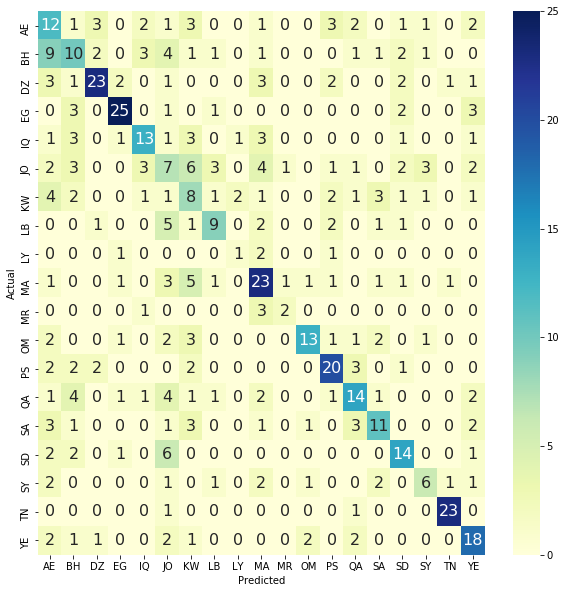

In [34]:
y_pred_nv = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred_nv)
df_cm = pd.DataFrame(conf_mat, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
seaborn.heatmap(df_cm,cmap= "YlGnBu", annot=True,annot_kws={"size": 16})
# # plt.savefig("bayes confusion")

## Build a classifier to predict the correct topic for the 290 documents in the test split

In [35]:
y= pdf_train['topic']
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.20, random_state = 0, stratify = y)

In [36]:
parameters = {'alpha':[0.01,0.0001,0.1,1,2] }

clf = MultinomialNB()
clf = GridSearchCV(clf, parameters, cv =5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.0001, 0.1, 1, 2]})

In [37]:
print("Best cross-validation accuracy: {:.2f}".format(clf.best_score_))
print("Test set score: {:.2f}".format(clf.score(X_test, y_test)))
print("Best parameters: {}".format(clf.best_params_))

Best cross-validation accuracy: 0.92
Test set score: 0.91
Best parameters: {'alpha': 0.1}


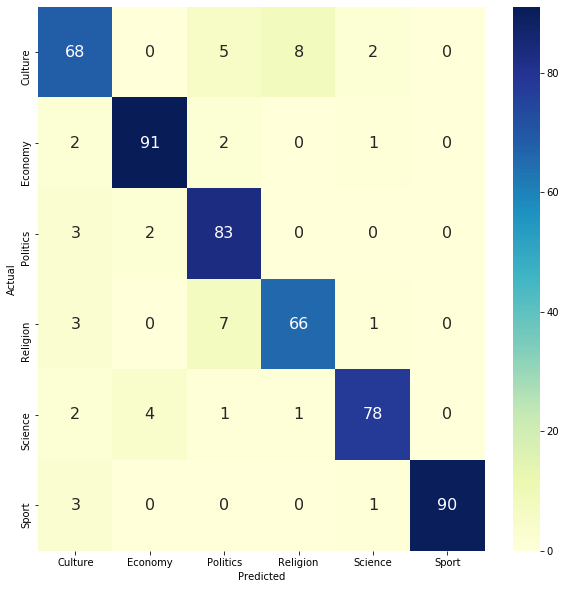

In [38]:
y_pred_nv = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred_nv)
df_cm = pd.DataFrame(conf_mat, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
seaborn.heatmap(df_cm,cmap= "YlGnBu", annot=True,annot_kws={"size": 16})
# # plt.savefig("bayes confusion")

## Submit your predictions in a text files 

In [39]:
pdf_test.head()

text country topic split
2620   أخبار صحية  2011.12.06  واحد من كل عشرة يعاني...     UNK   UNK  test
2621   لافروف دعا المعارضة للاعتراف بعدم وجود بديل ع...     UNK   UNK  test
2622       الشباب بالإسلام شلال رباني يحيي موات القل...     UNK   UNK  test
2623   كشف ممتاز السعيد وزير المالية عن إجراء مشاورا...     UNK   UNK  test
2624   جاك والفهد يدينان اختطاف رئيس اللجنة الأولمبي...     UNK   UNK  test

In [40]:
T = pdf_test['text']
test = vectorizer.transform(T)

In [41]:
outputs = clf.predict(test)

In [42]:
f=open('predictions_topic_Name.txt','w')
for ele in outputs:
    f.write(ele+'\n')
f.close()